# Exploratory data analysis 

Investigation of the abalone data set for the Kaggle <a href=(https://www.kaggle.com/competitions/playground-series-s4e4/overview >Playground Series - Season 4, Episode 4</a>

### Summary
 - **For training, we have 90,615 observations** and 8 features (1 categorical and 7 numerical); **the target variable is Rings**, which is an indicator of the Abalone's age. The test set has 60,411 rows, for which we need to predict the Rings column.
 
 - There are no nulls or duplicates
 
 - **Diameter** and **Height** have much lower variances than the other features; hence, we should consider **standardising** the data
 
 - The features in the train and test sets have similar distributions
 
 - Unsurprisingly, there is a **very strong positive linear correlation** between the columns. This is intuitive because they are all physical measurements of a shellfish - and you would expect a shellfish with larger diameter to have, say, a larger height and a larger weight. Similarly, you'd expect older shellfish (i.e., shellfish with more rings) to be bigger
 
 - **Interestingly, the average abalone size decreases up to 5 Rings**, which is an artefact of the deep learning model that generated this data. We need to further investigate whether to correct this or leave it as it is
 
 - Male and females have similar physical measurements while infants are significantly smaller and lighter. Also infants have a different distribution of rings

**Content:**
1. Data evaluation and treatment
2. Summary statistics and feature distributions
3. Linear Correlation
4. Target-Feature Relationships
5. Feature difference between sexes
6. Target Distribution
7. Conclusions

#### Import Libraries and Data

In [2]:
# Data exploration and manipulation
import pandas as pd
import numpy as np
from scipy.stats import kruskal

# Data Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_df = pd.read_csv('scratch_data/playground-series-s4e4/train.csv')
test_df = pd.read_csv('scratch_data/playground-series-s4e4/test.csv')
sample_sub = pd.read_csv('scratch_data/playground-series-s4e4/sample_submission.csv')

#### 1. Data evaluation and treatment

In [8]:
train_df.head(3)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.55,0.43,0.150,0.7715,0.3285,0.1465,0.240,11
1,1,F,0.63,0.49,0.145,1.1300,0.4580,0.2765,0.320,11
2,2,I,0.16,0.11,0.025,0.0210,0.0055,0.0030,0.005,6


In [9]:
test_df.head(3)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405


In [14]:
# check if there is one id per row
print(len(train_df) == len(train_df['id'].unique()))
print(len(test_df) == len(test_df['id'].unique()))

True
True


There is one observation per **id**, hence the id column can be used as the index of the dataframe

In [5]:
# Set id column as index for easier manipulation and plotting
train_df.set_index('id',inplace = True)
test_df.set_index('id',inplace = True)

In [6]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 60411 entries, 90615 to 151025
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             60411 non-null  object 
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3

- train_df and test_df have the same column exept the target **Rings**
- there is 1 cateorical feature (Sex) and 7 numerical features
- **there are no nulls**

In [7]:
# Check for duplicates:
train_duplicate_count = train_df.duplicated().sum()
test_duplicate_count = test_df.duplicated().sum()

print(f'Train data. Number of duplicate rows: {train_duplicate_count}')
print()
print(f'Test data. Number of duplicate rows: {test_duplicate_count}')

Train data. Number of duplicate rows: 0

Test data. Number of duplicate rows: 0


- **there are no duplicates**

#### 2. Summary statistics and feature distributions

In [8]:
train_df.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


The features are on similar scales (mean between 0.1 and 1). However, **Diameter** and **Height** have much lower variances (std < 0.1); we should keep this in mind because features with higher variances could bias a model that assumes the data is normally distributed (e.g., kNN, Linear Regression, k-mean). If features in our dataset have a variance that's an order of magnitude or more greater than the other features, this could impact the model's ability to learn from other features in the dataset. To prevent this we can use **Standardization**

In [9]:
test_df.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
count,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000
mean,0.517428,0.401961,0.135751,0.790062,0.341227,0.169419,0.226125
std,0.117609,0.097470,0.038175,0.457591,0.204221,0.100720,0.129826
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.345000,0.110000,0.419500,0.178500,0.086500,0.120000
50%,0.545000,0.425000,0.140000,0.801500,0.329000,0.166000,0.225000
75%,0.600000,0.470000,0.160000,1.070000,0.464500,0.232500,0.305000
max,0.800000,0.650000,1.095000,2.825500,1.488000,0.641500,1.004000


train_df and test_df have very similar summary statistics idicating simlar distributions. This can be confirmed visually in the plots below

In [10]:
train_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

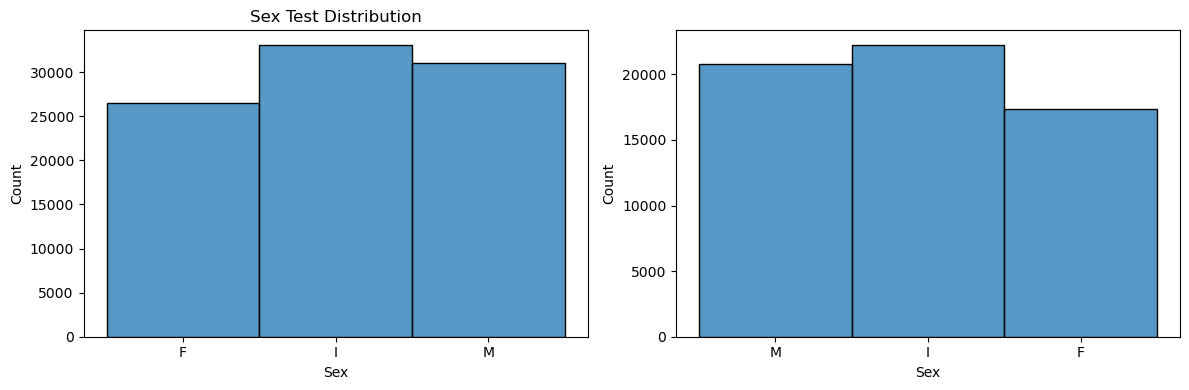

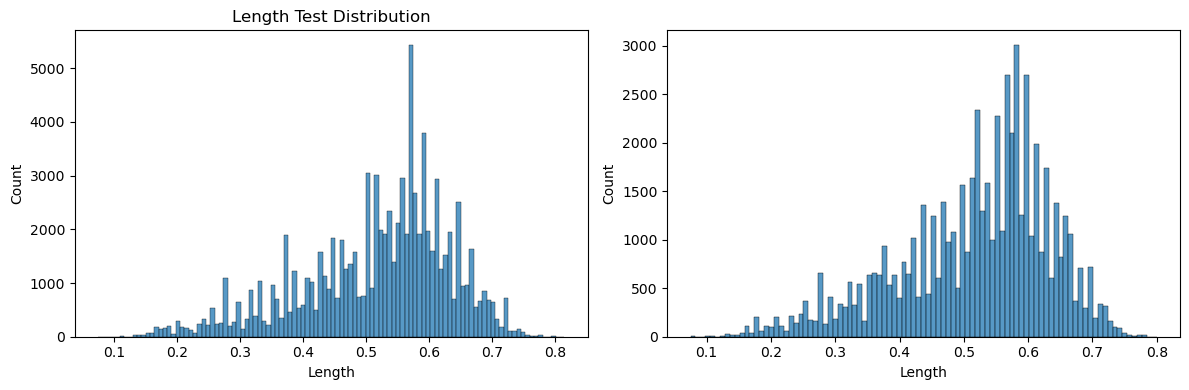

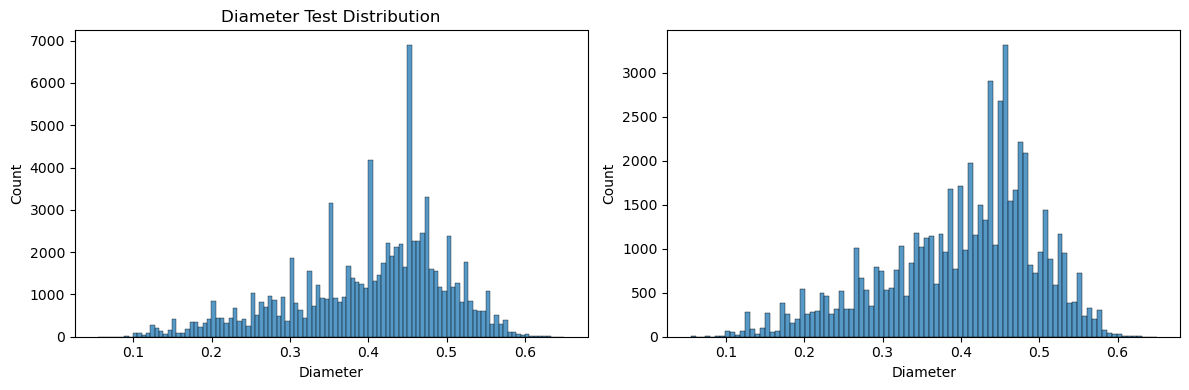

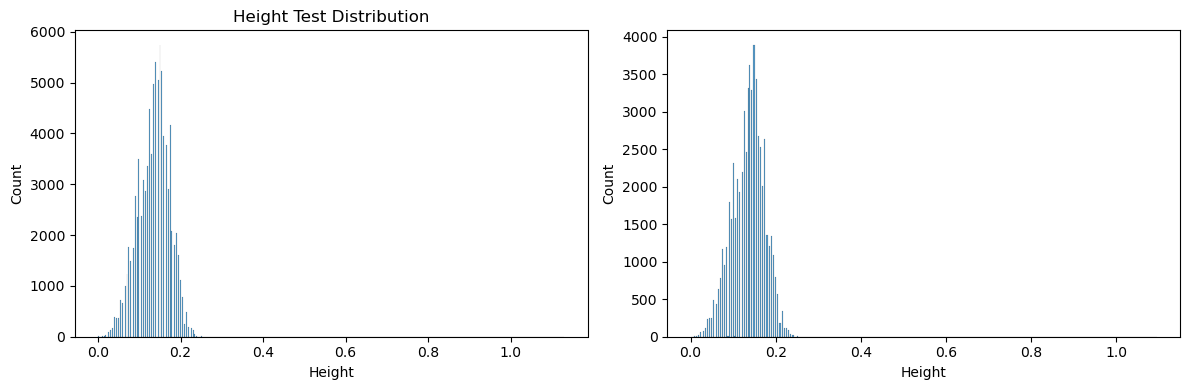

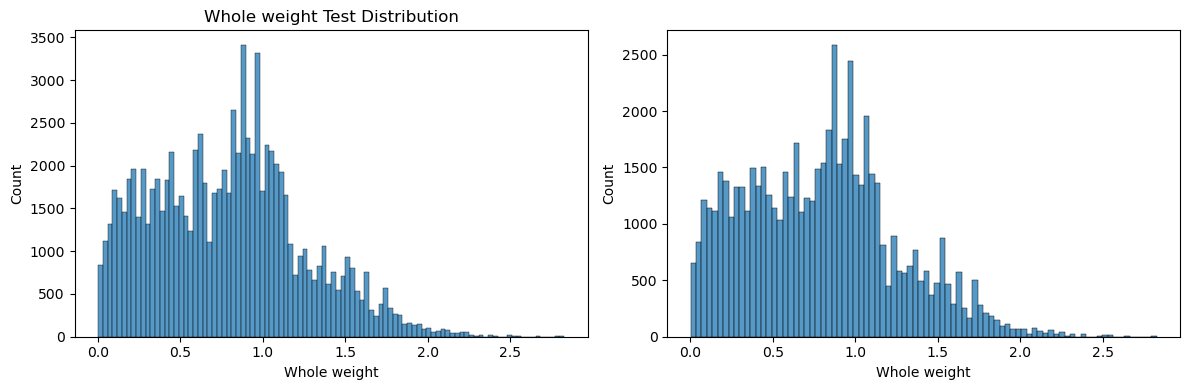

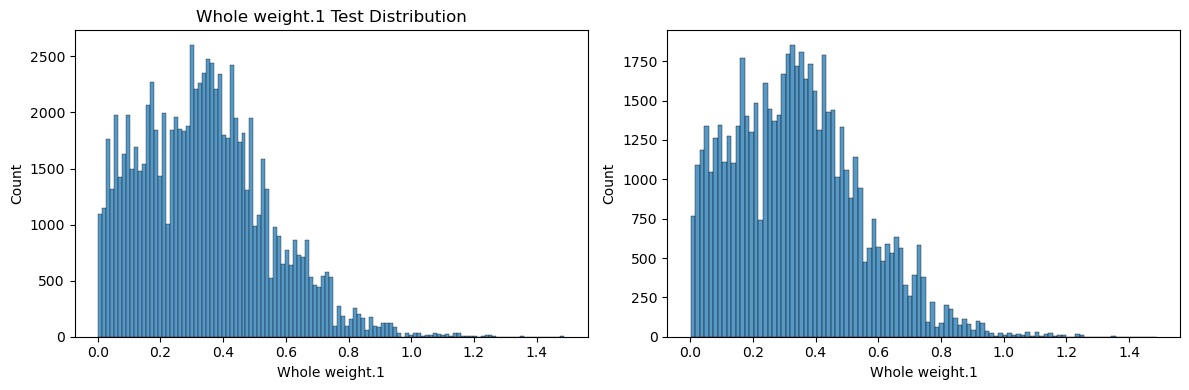

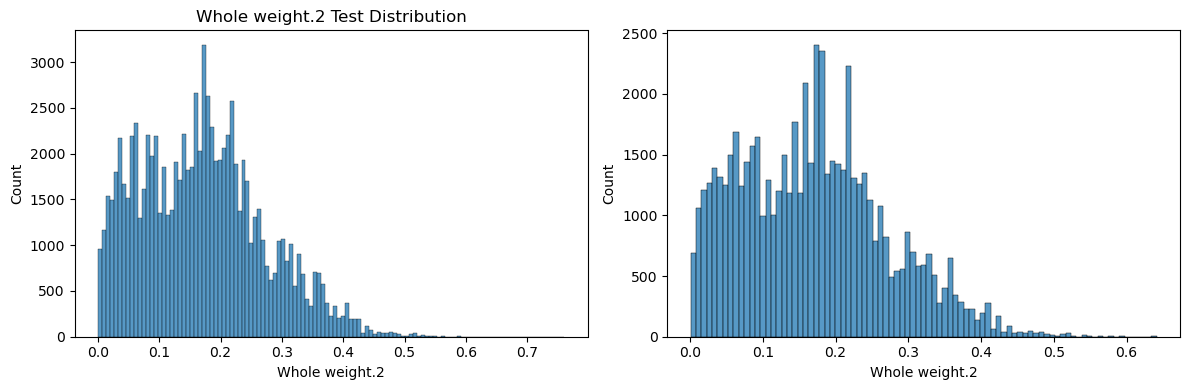

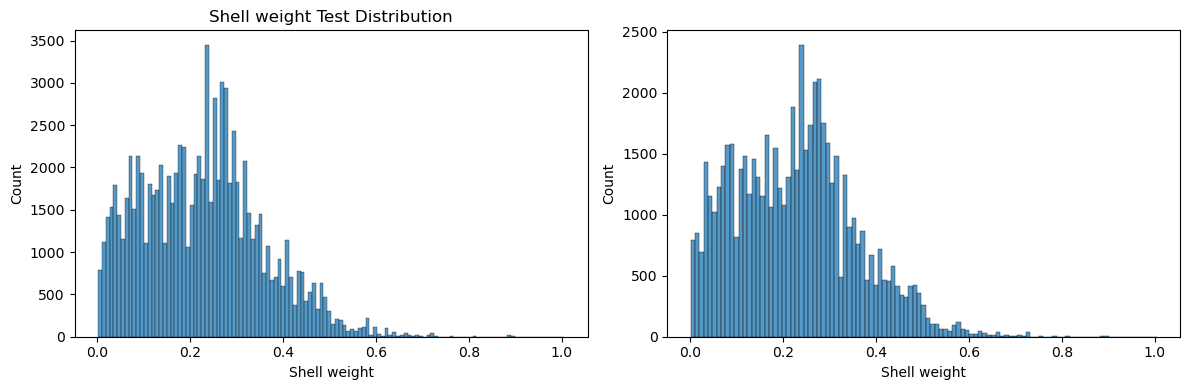

In [11]:
# select the columns to compare
features_ = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1','Whole weight.2', 'Shell weight']

for feature in features_:

    # Set up the figure and axis
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Plot histogram for training data
    sns.histplot(train_df[feature], ax=axs[0])
    axs[0].set_title(f'{feature} Train Distribution')

    # Plot histogram for training data
    sns.histplot(test_df[feature], ax=axs[1])
    axs[0].set_title(f'{feature} Test Distribution')

    # Adjust layout to prevent overlap
    plt.tight_layout()

The plots above confirm that the distributions of the feature in train_df and test_df are very similar

#### 3. Linear Correlation

In [12]:
corr = train_df.corr(method='pearson', numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
Length,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole weight,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Whole weight.1,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Whole weight.2,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell weight,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


Unsurprisingly, there is a very strong linear correlation between the columns. This is intuitive because they are all physical measurements of a shellfish - and you would expect a shellfish with larger diameter to have, say, a larger height and a larger weight. Similarly, you'd expect older shellfish (i.e., shellfish with more rings) to be bigger). This means we could potentially drop most columns and just keep the ones least correlated

#### 4. Target-Feature Relationships

In [13]:
# For each number of rings, let's take the average measurement
train_grouped = train_df.groupby('Rings', as_index = False).mean(numeric_only = True)

<Figure size 640x480 with 0 Axes>

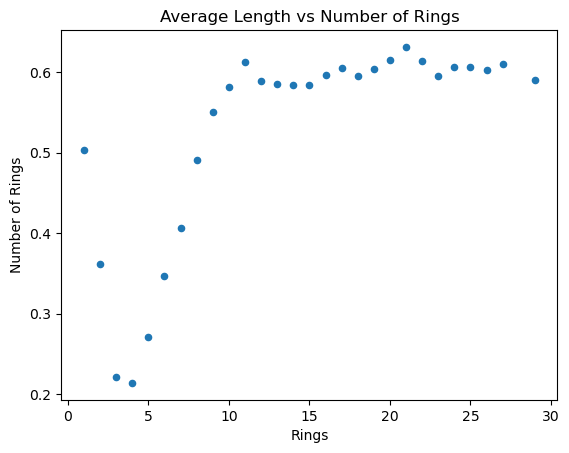

<Figure size 640x480 with 0 Axes>

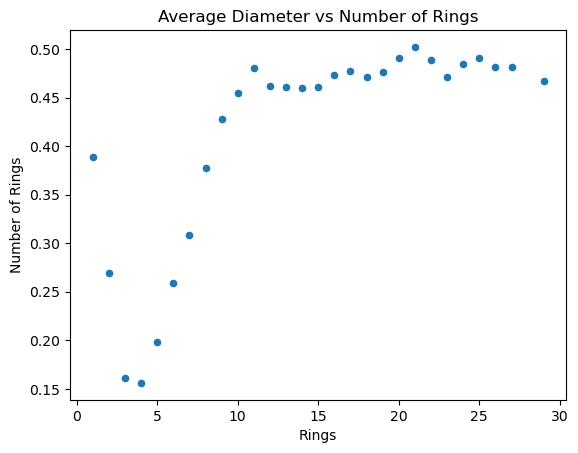

<Figure size 640x480 with 0 Axes>

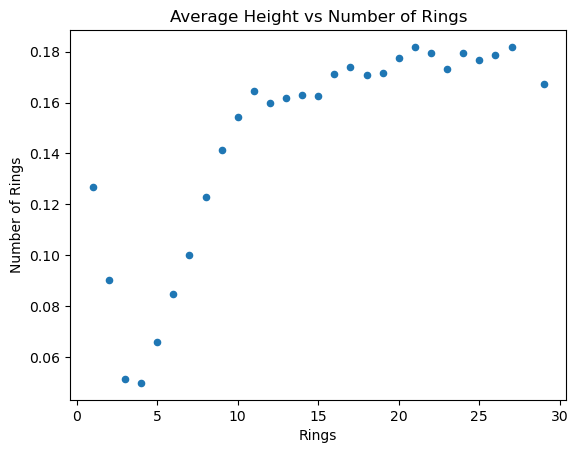

<Figure size 640x480 with 0 Axes>

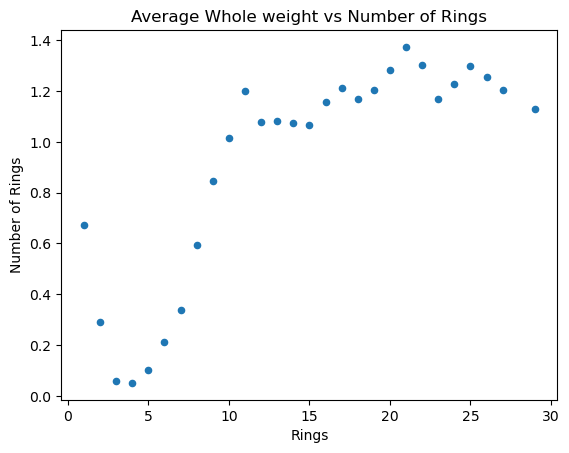

<Figure size 640x480 with 0 Axes>

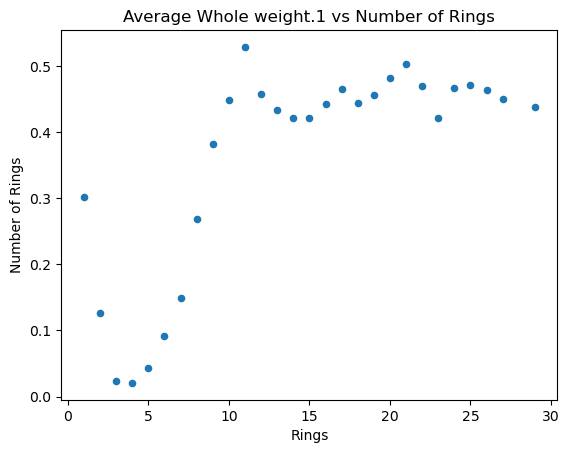

<Figure size 640x480 with 0 Axes>

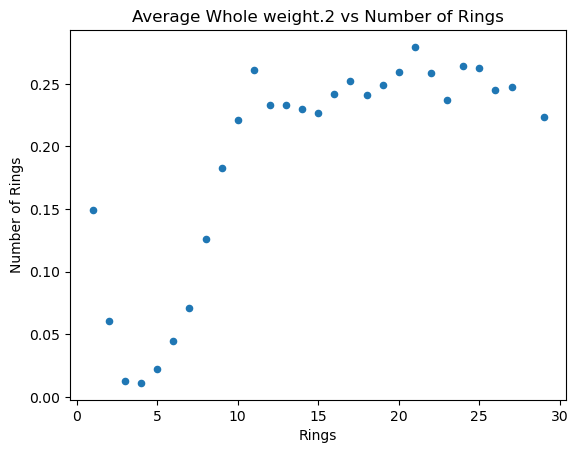

<Figure size 640x480 with 0 Axes>

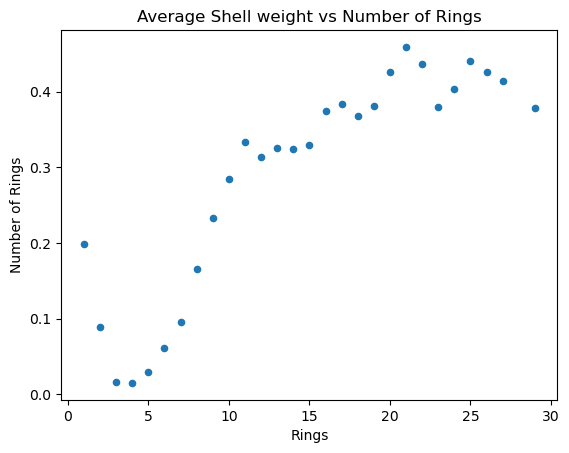

In [14]:
# select the columns to compare
features_ = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

for feature in features_:
    plt.figure()
    train_grouped.plot.scatter(x='Rings', y=feature)
    plt.title(f'Average {feature} vs Number of Rings')
    plt.ylabel(f'Average {feature}')
    plt.ylabel(f'Number of Rings')
    plt.show()

**Interestingly, the abalones seem become smaller and lighter until 5 Rings; then they become bigger up to 12 Rings, and then they remain somewhat similar size.** The decrease in size up to 5 Rings seems wrong and is not shown in the original abalone data set (see EDA-original.ipynb file in this repository). Therefore, it is probably an erro in the deep learning model used to create the data. With this in mind, we now have two options:

1. We fix this behavior based on common sense or the orinial data. However, is this error is present in the test set as well (which is likely) then we will get the wrong predictions
2. We keep this as it is and make the predictions accordingly

We can test the best course of action by making two submissions with the same model, one where is adjust for this behavior and one where we don't.

#### 5. Feature difference between sexes

In [15]:
sex_grouped = train_df.groupby(['Sex','Rings'], as_index= False).median()

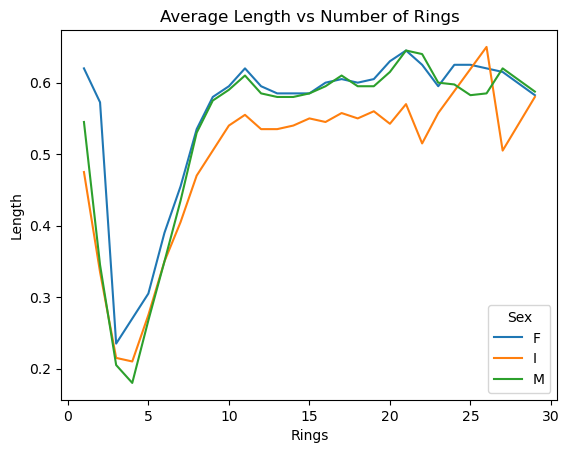

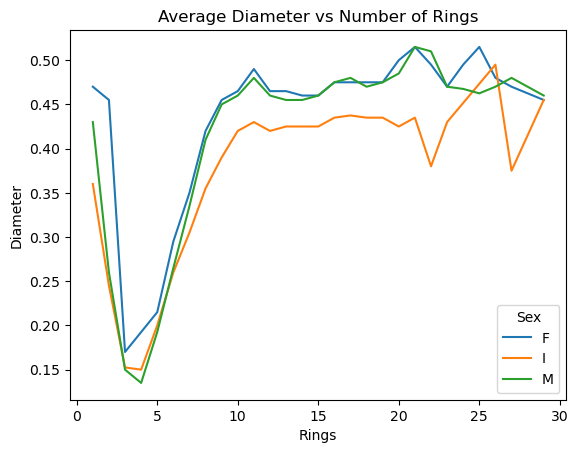

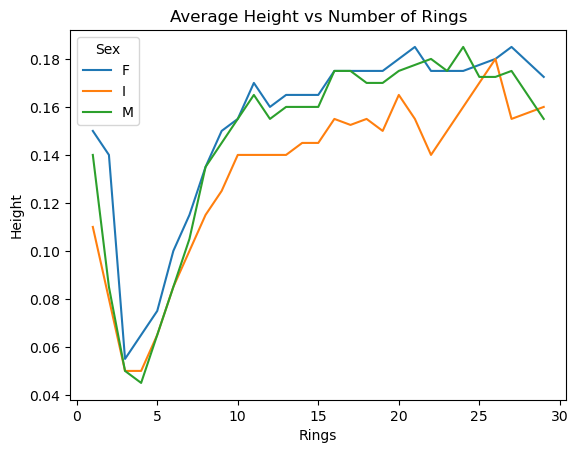

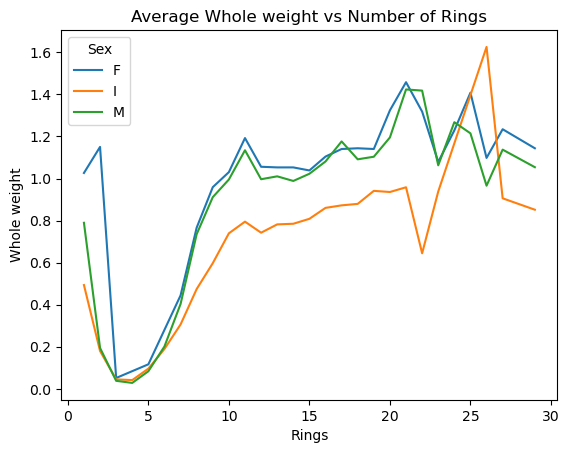

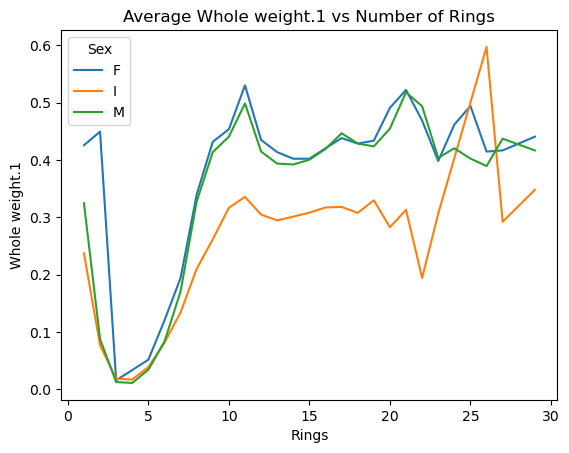

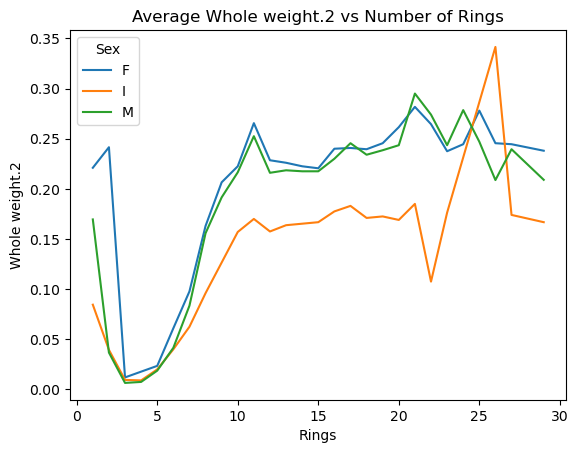

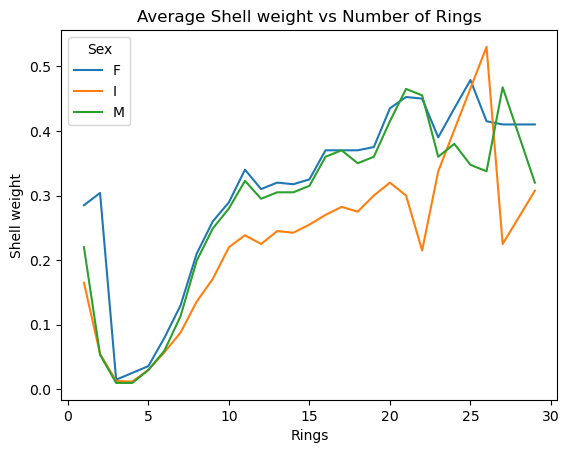

In [16]:
# select the columns to compare
features_ = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

for feature in features_:
    plt.figure()
    sns.lineplot(x='Rings', y=feature, data=sex_grouped, hue = 'Sex')
    plt.title(f'Average {feature} vs Number of Rings')

The plots show that male and female have very similar phyical measurements (not so much so before 4 rings and after 23 rings. On the other hand, Infants are significantly smaller and lighter.

In [17]:
#### 6. Targets Distribution

Text(0.5, 1.0, 'Rings Distribution')

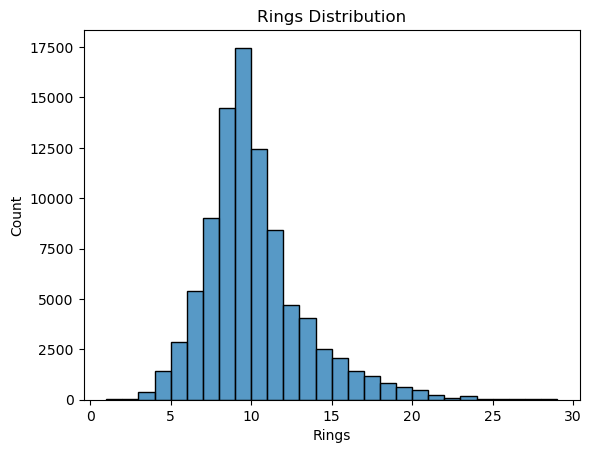

In [18]:
# Rings distribution
sns.histplot(train_df["Rings"], binwidth=1)
plt.title('Rings Distribution')

**Most abalones observed have around 9 rings**

#### Target Distribution by Sex

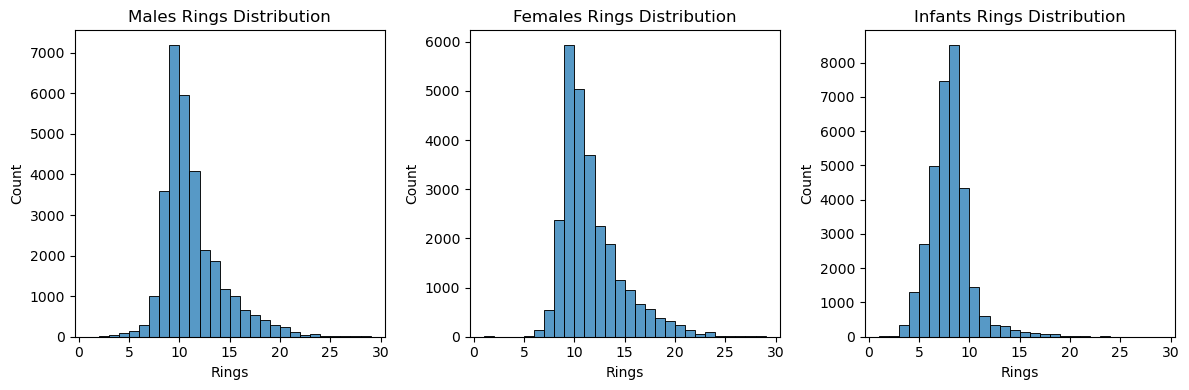

In [19]:
# Set up the figure and axis
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot histogram for training data
sns.histplot(train_df[train_df['Sex'] == 'M']["Rings"], ax=axs[0], binwidth=1)
axs[0].set_title('Males Rings Distribution')

# Plot histogram for training data
sns.histplot(train_df[train_df['Sex'] == 'F']["Rings"], ax=axs[1], binwidth=1)
axs[1].set_title('Females Rings Distribution')

# Plot histogram for training data
sns.histplot(train_df[train_df['Sex'] == 'I']["Rings"], ax=axs[2], binwidth=1)
axs[2].set_title('Infants Rings Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

Again, Male and Female have a vey similar distribution of Rings (mean ~ 10), which are quite different from that of Infants (mean ~ 8). We can check this statistically  with a Kruskal-Wallis test. 

**The Kruskal Wallis Test is a nonparametric test, sometimes referred to as One-Way ANOVA on ranks. It is a nonparametric alternative to One-Way ANOVA. It is an extension of the Man-Whitney Test to situations where more than two levels/populations are involved. This test falls under the family of Rank Sum tests. It depends on the ranks of the sample observations. <a href=(https://www.geeksforgeeks.org/kruskal-wallis-test/ >Source Here</a>**

We use this test to determine if there are statistically significant differences in the median 'Rings' values across the categories of 'Sex'.
Used test is a two-sided test with hypotheses formulated in following way:
 - *H0:* Median 'Rings' values are equal across all categories of 'Sex'.
 - *H1:* At least one group has a different median 'Rings' value compared to the others.

In [20]:
# Extract 'Rings' values for each category of 'Sex'
grouped_data = [train_df[train_df['Sex'] == category]['Rings'] for category in ['M', 'F', 'I']]

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*grouped_data)

# Print the H-statistic and p-value
print("H-statistic:", h_statistic)
print("p-value:", p_value)

H-statistic: 35204.203498008435
p-value: 0.0


* The H-statistic is quite large (35204), indicating substantial differences between the ranked sums of observations in each group.
* The p-value = (0.0). This means that there are statistically significant differences in the median 'Rings' values across the categories of 'Sex'.
* Based on this test we can reject the null hypothesis and conclude that there are statistically significant differences in the median 'Rings' values between at least two categories of 'Sex'.

#### 7. Conclusions

##### Preprocessing
1. Set **id** column as index
2. Transform sex to numerical - since males and females have very similar physical measurements, we could use a binary feature with 0 and 1 for infants and non-infants, respectively.
3. We could keep only features **Length** and **Whole Weight** since all other are strongly linearly correlated to them

##### Further Analysis
1. Investigate "unphysical" growth behavior of abalones (see section "4. Target-Feature Relationships")